#### <h1 style="color:#189AB4"><strong>Introduction</strong></h1>

<p style="font-size:120%">
<strong>Kaggle</strong> competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, Kaggle have launched many Playground competitions that are more approachable than Featured competition, and thus more beginner-friendly.
<p> 
    
<p style="font-size:120%">
The dataset is used for this competition, <strong><a href="https://www.kaggle.com/c/tabular-playground-series-dec-2021">Tabular Playground Series - Dec 2021</a></strong>, is synthetic, but based on a real dataset and generated using a <a href="https://github.com/sdv-dev/CTGAN">CTGAN</a>. For this competition, you will be predicting a categorical target based on a number of feature columns given in the data.  This dataset is based off of the original <a href="https://www.kaggle.com/c/forest-cover-type-prediction/overview">Forest Cover Type Prediction competition</a>. Submissions are evaluated on <strong>multi-class classification accuracy</strong>.
<p>

<h1 style="color:#189AB4"><strong>Setup</strong></h1>

In [1]:
# import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# reduce memory usage

def reduce_memory_usage(df):
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    pass
        else:
            df[col] = df[col].astype('category')
    
    return df

In [3]:
# read data into dataframe

train = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
reduce_memory_usage(train)

test = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')
reduce_memory_usage(test);

<h1 style="color:#189AB4"><strong>Exploratory Data Analysis</strong></h1>

In [4]:
# concise summary of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int32
 1   Elevation                           int16
 2   Aspect                              int16
 3   Slope                               int8 
 4   Horizontal_Distance_To_Hydrology    int16
 5   Vertical_Distance_To_Hydrology      int16
 6   Horizontal_Distance_To_Roadways     int16
 7   Hillshade_9am                       int16
 8   Hillshade_Noon                      int16
 9   Hillshade_3pm                       int16
 10  Horizontal_Distance_To_Fire_Points  int16
 11  Wilderness_Area1                    int8 
 12  Wilderness_Area2                    int8 
 13  Wilderness_Area3                    int8 
 14  Wilderness_Area4                    int8 
 15  Soil_Type1                          int8 
 16  Soil_Type2                          

In [5]:
# first five rows
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


<p style="font-size:120%">
<strong>Data description</strong> can be found <a href="https://www.kaggle.com/c/forest-cover-type-prediction/data">here</a>.
</p>

In [6]:
# shape of data
print(train.shape)
print(test.shape)

(4000000, 56)
(1000000, 55)


In [7]:
# descriptive statistics
train.describe().T.sort_values(by='std' , ascending = False)

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Horizontal_Distance_To_Fire_Points,4000000.0,1.581407e+03,1.127616e+03,-277.0,781.00,1361.0,2084.00,8075.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0


Columns <strong>Soil_Type7</strong> and <strong>Soil_Type15</strong> have only zero values. So it will be dropped later

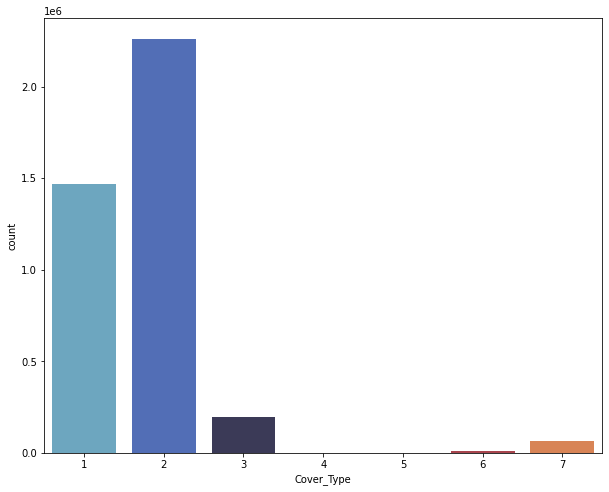

In [8]:
# distribution of labels

plt.figure(figsize=(10,8))
sns.countplot(x='Cover_Type', data=train, palette='icefire');

In [9]:
train['Cover_Type'].value_counts(ascending=False)

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

<p style="font-size:120%">The distribution of label is very unbalanced.

<h1 style="color:#189AB4"><strong>Preprocessing</strong></h1>

In [10]:
# predictor
X = train.drop(columns=['Id','Cover_Type','Soil_Type7','Soil_Type15'])

# target
y = train['Cover_Type']

# test data 
test_df = test.drop(columns=['Id','Soil_Type7','Soil_Type15'])

In [11]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=123, shuffle =True)

<h1 style="color:#189AB4"><strong>XGBClassifier</strong></h1>


In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.3,
                      tree_method='gpu_hist',
                      random_state=0)
model.fit(X_train,y_train)

[05:24:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [13]:
# validation prediction
y_pred=model.predict(X_val)

In [14]:
# validation accuracy
from sklearn.metrics import accuracy_score
print('Accuracy Score : ',accuracy_score(y_val, y_pred))

Accuracy Score :  0.95903


In [15]:
# test prediction
y_pred = model.predict(test_df)

In [16]:
# submission
submission = pd.read_csv('../input/tabular-playground-series-dec-2021/sample_submission.csv')
submission['Cover_Type'] = y_pred
submission.to_csv("submission.csv",index=False)
submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


<p style="font-size:120%"><strong>Thank You</strong><p/>